# Mini Projet MDI220

*By Daniel Jorge Deutsch*

In [1]:
import ssl
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

# Data Source Constants
LINK_NUCLEAR_POWER_ACCIDENTS = "https://innovwiki.ethz.ch/v1/images/NuclearPowerAccidents2016.csv"

# Exercise 1.1

In [2]:
# Avoids the "certificate verify failed" error when reading the csv
ssl._create_default_https_context = ssl._create_unverified_context

# Loads the dataframe
df = pd.read_csv(
    LINK_NUCLEAR_POWER_ACCIDENTS,                                                # Link in which the data is 
    header = 0,                                                                  # Ignores the first line (column names)
    names = ["date", "loc", "cost", "ines", "syth_mag", "reg", "desc", "fat"],   # Sets the name of each column
    keep_default_na = False,                                                     # Prevents pandas from considering the region NA as NaN
    na_values = [""],                                                            # Define only missing data as NaN
    parse_dates = ["date"]                                                       # Parse the date column into datetime
)

# Obtains the date of the Three Mile Island accident
tmi_date = df[df["desc"].str.contains("Three Mile Island")].iloc[0]["date"]

# Selects only the accidents that occured before the Three Mile Island accident
df = df[df["date"] < tmi_date]

# Drop all lines that have NaN in the cost column
df = df[df["cost"].notna()]

# Obtains the array cost
costs = df["cost"].to_numpy()

# Prints the size of the costs array
print(f"The costs array has {len(costs)} elements.")

The costs array has 55 elements.


# Exercise 1.2.a

Soit $ X \sim \mathcal{N}\left(\mu, \sigma \right) $ et $ Z \sim \mathcal{N}\left(0, 1 \right) $ deux variables aléatoires telles que $ X = \mu + \sigma Z $. Considérez la fonction de répartition $ \mathcal{F}\left(p; \mu, \sigma^2 \right) $ associée à $X$ telle que $ \mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right) $ soit son inverse. Alors, on a par définition:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2\right)\right) \quad = \quad p \qquad \forall p \in ]0,1[
\end{aligned}

<br>

Si on calcule $ \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1\right)\right) $, on a:

<br>

\begin{aligned}
    \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) \quad & = \quad P\left(X < \mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) \\
    & = \quad P\left(\frac{X-\mu}{\sigma} < \mathcal{F}^{-1}\left(p; 0, 1\right)\right) \\
    & = \quad P\left(Z < \mathcal{F}^{-1}\left(p; 0, 1\right)\right) \\
    & = \quad p
\end{aligned}

<br>

Alors, on a:

<br>

\begin{cases}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right)\right) \quad & = \quad p \\
    \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right) & = \quad p
\end{cases}

<br>

C'est a dire que:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right)\right) \quad = \quad \mathcal{F}\left(\mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1 \right)\right)
\end{aligned}

<br>

Une fois que $\mathcal{F}$ est strictement croissante, les arguments des fonctions d'égalité ci-dessus sont les mêmes, donc: 

<br>

\begin{aligned}
    \mathcal{F}^{-1}\left(p; \mu, \sigma^2 \right) \quad & = \quad \mu + \sigma \mathcal{F}^{-1}\left(p; 0, 1\right) \\
    & = \quad \mu + \sqrt{\sigma^2} \mathcal{F}^{-1}\left(p; 0, 1\right)
\end{aligned}

# Exercise 1.2.b

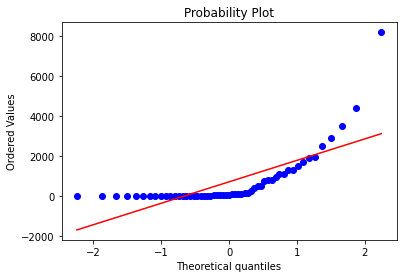

In [3]:
# Plots the QQ-plot using the normal law
osm, osr = sp.stats.probplot(costs, dist=sp.stats.distributions.norm, plot=plt)

# Exercise 1.3.a 

Soit $ X \sim \mathcal{E}\left(\lambda \right) $ et $ Z \sim \mathcal{E}\left(1 \right) $ deux variables aléatoires telles que $ Z = \lambda X $. Considérez la fonction de répartition $ \mathcal{F}\left(p; \lambda \right) $ associée à $X$ telle que $ \mathcal{F}^{-1}\left(p; \lambda \right) $ soit son inverse. Alors, on a par définition:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad = \quad p \qquad \forall p \in ]0,1[
\end{aligned}

<br>

Si on calcule $ \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) $, on a:

<br>

\begin{aligned}
    \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) \quad & = \quad P\left(X < \frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad P\left(\lambda X < \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad P\left(Z < \mathcal{F}^{-1}\left(p; 1 \right)\right) \\
    & = \quad p
\end{aligned}

<br>

Alors, on a:

<br>

\begin{cases}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad & = \quad p \\
    \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right) & = \quad p
\end{cases}

<br>

C'est a dire que:

<br>

\begin{aligned}
    \mathcal{F}\left(\mathcal{F}^{-1}\left(p; \lambda \right)\right) \quad = \quad \mathcal{F}\left(\frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)\right)
\end{aligned}

<br>

Une fois que $\mathcal{F}$ est strictement croissante, les arguments des fonctions d'égalité ci-dessus sont les mêmes, donc: 

<br>

\begin{aligned}
    \mathcal{F}^{-1}\left(p; \lambda \right) \quad = \quad \frac{1}{\lambda} \mathcal{F}^{-1}\left(p; 1 \right)
\end{aligned}

# Exercise 1.3.b

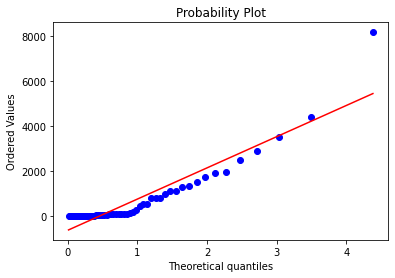

In [4]:
# Plots the QQ-plot using the exponential law
osm, osr = sp.stats.probplot(costs, dist=sp.stats.distributions.expon, plot=plt)

# Exercise 1.4

En regardant les graphiques des quantiles obtenus dans les exercises 1.2.b et 1.3.b, nous pouvons nous convaincre que l’approche exponentielle est plus acceptable comme loi de probabilité que la loi normale car ses couts sont plus proches de la droite sur le Q-Q plot.

# Exercise 2.1

A partir de la fonction fournie pour la loi exponentielle, on peut obtenir la densité de probabilité $f_X\left(x\right)$ par:

<br>

\begin{aligned}
    f_X\left(x\right) \quad & = \quad \frac{\partial \left(1 - P_\lambda \left(X_1 > x\right)\right)}{\partial x} \\
    & = \quad \frac{\partial \left(1 - e^{-\lambda x}\right)}{\partial x} \\
    & = \quad \lambda e^{-\lambda x}
\end{aligned}

<br>

Ayant le pdf en main, nous pouvons obtenir la fonction de vraisemblance, à travers:

<br>

\begin{aligned}
    f_X^{\otimes n}\left(x\right) \quad & = \quad \lambda^n e^{-\lambda \sum_{i = 1}^{n} x_i}
\end{aligned}

<br>

À partir de la fonction de vraisemblance, la log-vraisemblance est facilement obtenue:

<br>

\begin{aligned}
    ln\left(f_X^{\otimes n}\left(x\right)\right) \quad & = \quad ln\left(\lambda^n e^{-\lambda \sum_{i = 1}^{n} x_i}\right) \\
    & = \quad n \ ln\left(\lambda\right) - \lambda \sum_{i = 1}^{n} x_i
\end{aligned}

<br>

L'estimateur du maximum de vraisemblance $\hat{\lambda}_n$ est obtenu lorsque nous égalisons la dérivée de la fonction log-vraisemblance par rapport à $\lambda$ à zéro:

<br>

\begin{aligned}
    \frac{ln\left(f_X^{\otimes n}\left(x\right)\right)}{\partial \lambda} \quad & = \quad 0 \\ 
    \frac{n}{\hat{\lambda}_n} - \sum_{i = 1}^{n} x_i \quad & = \quad 0 \\ 
    \hat{\lambda}_n \quad & = \quad \frac{n}{\sum_{i = 1}^{n} x_i}
\end{aligned}

In [5]:
λn_hat = len(costs)/np.sum(costs)
print(f"λn_hat: {λn_hat}")

λn_hat: 0.0013767725947156965


# Exercise 2.2

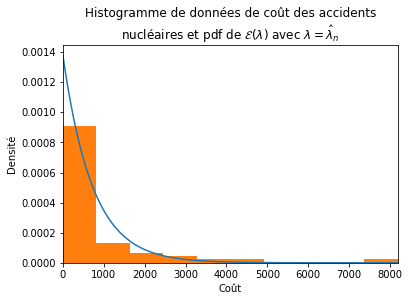

In [6]:
# Obtains the pdf
x = np.linspace(0, np.max(costs), int(np.max(costs)))   # Costs of the accidents
fX = λn_hat*np.e**(-λn_hat*x)                           # Probability Density Function

# Plot
plt.plot(x, fX)
plt.title(r"Histogramme de données de coût des accidents" + "\n" + r"nucléaires et pdf de $\mathcal{E}(\lambda)$ avec $\lambda = \hat{\lambda}_n$")
plt.xlabel("Coût")
plt.ylabel("Densité")
plt.xlim(x[0], x[-1])
n, bins, patches = plt.hist(costs, density=True)

# Exercise 2.3

D'abord on calcule l'esperance et la variance de $T_1\left(X\right)$:

<br>

\begin{aligned}
        E\left[T_1\left(X\right)\right] \quad & = \quad E\left[\frac{1}{n}\sum_{i=1}^{n}X_i\right]
        &&&
        Var\left[T_1\left(X\right)\right] \quad & = \quad Var\left[\frac{1}{n}\sum_{i=1}^{n}X_i\right]
    \\
        & = \quad \frac{1}{n}\sum_{i=1}^{n}E\left[X_i\right]
        &&&
        & = \quad \frac{1}{n^2}\sum_{i=1}^{n}Var\left[X_i\right]
    \\
        & = \quad \frac{1}{n}\frac{n}{\lambda}
        &&&
        & = \quad \frac{1}{n^2}\frac{n}{\lambda^2}
    \\
        & = \quad \frac{1}{\lambda}
        &&&
        & = \quad \frac{1}{n \lambda^2}
    \\
        & = \quad g_1\left(\lambda\right)
        &&&
        & < \quad \infty
\end{aligned}

<br>

Maintenant on calcule l'information de Fisher $I_1\left(\lambda\right)$ et la dérivée $\frac{\partial g_1\left(\lambda\right)}{\partial \lambda}$:

<br>

\begin{aligned}
        I_1\left(\lambda\right) \quad &  = \quad E\left[\left(\frac{\partial \left(\ ln \ f\left(X\right)\right)}{\partial \ \lambda}\right)^2\right] 
        &&&
        \frac{\partial g_1\left(\lambda\right)}{\partial \lambda} \quad & = \quad \frac{\partial \left(\frac{1}{\lambda}\right)}{\partial \lambda}
    \\
        & = \quad E\left[\left(\frac{\partial \left(ln\left(\lambda\right) - \lambda \ X\right)}{\partial \ \lambda}\right)^2\right]
        &&&
        & = \quad - \frac{1}{\lambda^2}
    \\
        & = \quad E\left[\left(\frac{1}{\lambda} - X\right)^2\right]
    \\
        & = \quad E\left[\frac{1}{\lambda^2} - \frac{2X}{\lambda} + X^2\right]
    \\
        & = \quad E\left[\frac{1}{\lambda^2}\right] - E\left[\frac{2X}{\lambda}\right] + E\left[X^2\right]
    \\
        & = \quad \frac{1}{\lambda^2} - \frac{2}{\lambda} E\left[X\right] + \left(Var\left[X\right] + E\left[X\right]^2\right)
    \\
        & = \quad \frac{1}{\lambda^2} - \frac{2}{\lambda} \frac{1}{\lambda} + \left(\frac{1}{\lambda^2} + \frac{1}{\lambda^2}\right)
    \\
        & = \quad \frac{1}{\lambda^2} - \frac{2}{\lambda^2} + \frac{2}{\lambda^2}
    \\
        & = \quad \frac{1}{\lambda^2}
\end{aligned}

<br>

Maintenant il suffit de vérifier si la borne de Cramér-Rao est respectée:

\begin{aligned}
    Var\left[T_1\left(X\right)\right] \quad & = \quad \frac{\left(\frac{\partial g_1\left(\lambda\right)}{\partial \lambda}\right)^2}{n \ I_1\left(\lambda\right)} \\
    \frac{1}{n \lambda^2} \quad & = \quad \frac{\frac{1}{\lambda^4}}{n \ \frac{1}{\lambda^2}} \\
    \frac{1}{n \lambda^2} \quad & = \quad \frac{1}{n \lambda^2}
\end{aligned}

Donc $T_1\left(X\right)$ est un estimateur efficace pour $g_1\left(\lambda\right)$.

# Exercise 2.4

In [7]:
T1 = np.sum(costs)/len(costs)
print(f"g1: {T1}")

g1: 726.3363636363637


# Exercise 2.5

On commence par calculer les biais $b\left(\lambda, T_1\left(X\right)\right)$ et $b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$ de $T_1\left(X\right)$ et $\tilde{T}_{1, \eta}\left(X\right)$, respectivement:

<br>

\begin{aligned}
        b\left(\lambda, T_1\left(X\right)\right) \quad & = \quad E\left[T_1\left(X\right) - g_1\left(\lambda\right)\right]
        &&&
        b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad E\left[\tilde{T}_{1, \eta}\left(X\right) - g_1\left(\lambda\right)\right]
    \\
        & = \quad E\left[T_1\left(X\right)\right] - g_1\left(\lambda\right) 
        &&&
        & = \quad E\left[\tilde{T}_{1, \eta}\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & = \quad g_1\left(\lambda\right) - g_1\left(\lambda\right) 
        &&&
        & = \quad E\left[\eta \ T_1\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & = \quad 0 \quad \text{comme prévu, une fois que } T_1\left(X\right) \text{est non biaisé}
        &&&
        & = \quad \eta \ E\left[T_1\left(X\right)\right] - g_1\left(\lambda\right)
    \\
        & \quad
        &&&
        & = \quad \eta \ g_1\left(\lambda\right) - g_1\left(\lambda\right)
    \\
        & \quad
        &&&
        & = \quad g_1\left(\lambda\right) \ \left(1 - \eta\right)
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda} \ \left(1 - \eta\right)
\end{aligned}

<br>

Maintenant, on peut calculer les risques quadratiques $R\left(\lambda, T_1\left(X\right)\right)$ et $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$:

<br>

\begin{aligned}
        R\left(\lambda, T_1\left(X\right)\right) \quad & = \quad E\left[\left(T_1\left(X\right)-g_1\left(\lambda\right)\right)^2\right]
        &&&
        R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad E\left[\left(\tilde{T}_{1, \eta}\left(X\right)-g_1\left(\lambda\right)\right)^2\right]
    \\
        & = \quad \underbrace{b\left(\lambda, T_1\left(X\right)\right)^2}_{\text{= 0}} + Var\left(T_1\left(X\right)\right)
        &&&
        & = \quad b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)^2 + Var\left(\tilde{T}_{1, \eta}\left(X\right)\right)
    \\
        & = \quad Var\left(T_1\left(X\right)\right)
        &&&
        & = \quad \left(\frac{1}{\lambda} \ \left(1 - \eta\right)\right)^2 + Var\left(\eta \ T_1\left(X\right)\right)
    \\
        & = \quad \frac{1}{n\lambda^2}
        &&&
        & = \quad \frac{1}{\lambda^2} \ \left(1 - \eta\right)^2 + \eta^2 \ Var\left(T_1\left(X\right)\right)
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda^2} \ \left(1 - \eta\right)^2 + \eta^2 \ \frac{1}{n \ \lambda^2}
    \\
        & \quad
        &&&
        & = \quad \frac{1}{\lambda^2} \left(\left(\eta - 1\right)^2 + \frac{\eta^2}{n}\right)
\end{aligned}

<br>

Alors, on a:

<br>

\begin{aligned}
    R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & < \quad R\left(\lambda, T_1\left(X\right)\right) \\
    R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) - R\left(\lambda, T_1\left(X\right)\right) \quad & < \quad 0 \\
    \frac{1}{\lambda^2} \left(\left(\eta - 1\right)^2 + \frac{\eta^2}{n}\right) - \frac{1}{n\lambda^2} \quad & < \quad 0 \\
    \frac{\left(\eta - 1\right)^2}{\lambda^2} + \frac{\eta^2 - 1}{n\lambda^2} \quad & < \quad 0 \\
    \left(\eta - 1\right)^2 + \frac{\eta^2 - 1}{n} \quad & < \quad 0 & \left(\forall\lambda > 0 \right) \\
    \left(\eta - 1\right) \left(\eta - 1 + \frac{\eta + 1}{n}\right) \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\frac{\left(n + 1\right) \eta + \left(1 - n\right)}{n}\right] \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\left(n + 1\right) \eta + \left(1 - n\right)\right] \quad & < \quad 0 & \left(n > 0\right) \\
    \left(\eta - 1\right) \left[\eta + \frac{1 - n}{n + 1}\right] \quad & < \quad 0 \\
    \left(\eta - 1\right) \left[\eta - \frac{n - 1}{n + 1}\right] \quad & < \quad 0
\end{aligned}

<br>

Ce qui ne sera vrai que dans les situations suivantes:

<br>

\begin{aligned}
    \left(i\right)
    \begin{cases}
        \eta - 1 \quad & < \quad 0 \\
        \eta - \frac{n-1}{n+1} \quad & > \quad 0
    \end{cases}
    &&&&
    et
    &&&&
    \left(ii\right)
    \begin{cases}
        \eta - 1 \quad & > \quad 0 \\
        \eta - \frac{n-1}{n+1} \quad & < \quad 0
    \end{cases}
\end{aligned}

<br>

On a donc que seule la valeur $\eta \in \left]\frac{n-1}{n+1}, \ 1\right[$ satisfait le système $\left(i\right)$ et que $\nexists \ \eta \in \mathbb{R}$ qui satisfait le système $\left(ii\right)$. Donc, comme nous voulons joindre les intervalles obtenus pour $\eta$ dans les systèmes $\left(i\right)$ et $\left(ii\right)$, l'intervalle de valeurs de $\eta$ dans lequel $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) < R\left(\lambda, T_1\left(X\right)\right)$ est:

<br>

\begin{aligned}
    \eta \in \left]\frac{n-1}{n+1}, \ 1\right[
\end{aligned}

<br>

**Il est à noter que ce résultat ne contredit pas la question précédente car $\tilde{T}_{1, \eta}\left(X\right)$ est biaisé.**

# Exercise 2.6

Soit $g_2\left(\lambda\right)$ la médiane de la variable aléatoire $ X \sim \mathcal{E}\left(\lambda \right) $, on a par définition:

<br>

\begin{aligned}
    \int_{0}^{g_2\left(\lambda\right)}f_X\left(x\right) dx \quad & = \quad \frac{1}{2} \\
    \int_{0}^{g_2\left(\lambda\right)}\lambda e^{-\lambda x} dx \quad & = \quad \frac{1}{2} \\
    \lambda \left(\frac{-e^{-\lambda x}}{\lambda}\right)_{0}^{g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    \left(-e^{-\lambda x}\right)_{0}^{g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    1 - e^{-\lambda g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    e^{-\lambda g_2\left(\lambda\right)} \quad & = \quad \frac{1}{2} \\
    -\lambda g_2\left(\lambda\right) \quad & = \quad ln\left(\frac{1}{2}\right) \\
    -\lambda g_2\left(\lambda\right) \quad & = \quad -ln\left(2\right) \\
    g_2\left(\lambda\right) \quad & = \quad \frac{ln\left(2\right)}{\lambda} 
\end{aligned}

<br>

Ainsi, puisque $\tilde{T}_{1, \eta}\left(X\right)$ est un estimateur sans biais de la médiane, on a:

<br>

\begin{aligned}
    b\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right) \quad & = \quad 0 \\
    E\left[\tilde{T}_{1, \eta}\left(X\right) - g_2\left(\lambda\right)\right] \quad & = \quad 0 \\
    E\left[\tilde{T}_{1, \eta}\left(X\right)\right] - g_2\left(\lambda\right) \quad & = \quad 0 \\
    E\left[\tilde{T}_{1, \eta}\left(X\right)\right] \quad & = \quad g_2\left(\lambda\right) \\
    \eta \ E\left[T_1\left(X\right)\right] \quad & = \quad \frac{ln\left(2\right)}{\lambda} \\
    \eta \ g_1\left(\lambda\right) \quad & = \quad \frac{ln\left(2\right)}{\lambda} \\
    \eta \ \frac{1}{\lambda} \quad & = \quad \frac{ln\left(2\right)}{\lambda} \\
    \eta \quad & = \quad ln\left(2\right) 
\end{aligned}

In [8]:
# Obtains the empirical median
emp_median = np.median(costs)

# Obtains the estimated median
η = np.log(2)
est_median = η*T1

print(f"Empirical median: {emp_median}")
print(f"Estimated median: {est_median}")

Empirical median: 89.9
Estimated median: 503.4580025927086


# Exercise 2.7

À partir du graphique ci-dessous, on peut clairement voir que pour des valeurs inférieures de n, le risque quadratique de $\tilde{T}_{1, \eta}\left(X\right)$ est inférieur à celui de $\tilde{T}_1\left(X\right)$. Pour des valeurs plus élevées, cependant, le contraire est noté.

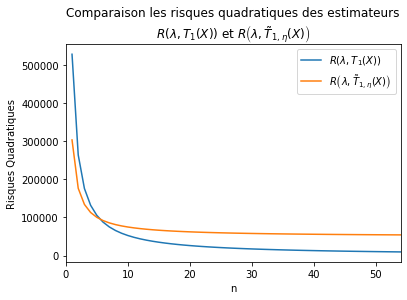

In [9]:
# Obtains the n axis
n = np.linspace(0, len(costs)-1, len(costs))

# Obtains the quadratic risks by the formulas in 2.5
RT1 = 1/(n*λn_hat**2)
RT1η = (1/λn_hat**2)*((η-1)**2 + (η**2/n))

# Plot
plt.plot(n, RT1)
plt.plot(n, RT1η)
plt.title(r"Comparaison les risques quadratiques des estimateurs" + "\n" + r"$R\left(\lambda, T_1\left(X\right)\right)$ et $R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$")
plt.legend([r"$R\left(\lambda, T_1\left(X\right)\right)$", r"$R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$"])
plt.xlabel("n")
plt.ylabel("Risques Quadratiques")
plt.xlim(n[0], n[-1])
plt.show()

# Exercise 3.1

En considérant que les variables aléatoires $X_j \sim \mathcal{E}\left(\lambda \right)$, $j = 1, 2, ..., n$ sont $iid$ (Independent Identically Distributed), nous avons que la fonction caractéristique de $Y = \sum_{j=1}^{n} X_i$ est donnée par:

<br>

\begin{aligned}
    \mathcal{\phi}_{Y}\left(t\right) \quad & = \quad \prod_{j=1}^{n} \mathcal{\phi}_{X_j}\left(t\right) \\
    & = \quad \prod_{j=1}^{n} \frac{1}{1 - \frac{it}{\lambda}} \\
    & = \quad \frac{1}{\left(1 - \frac{it}{\lambda}\right)^n} \\
\end{aligned}

<br>

On s'est alors rendu compte que la fonction caractéristique de la variable aléatoire $Y$ est égale à la fonction caractéristique d'une variable qui suit la loi $Gamma\left(k, \theta\right)$ avec $k = n$ et $\theta = \frac{1}{\lambda}$. Ainsi, on peut dire que $Y \sim Gamma\left(n, \frac{1}{\lambda}\right)$.

On veut alors vérifier si le coût moyen d'un accident est inférieur à 1 milliard de dollars, c'est-à-dire si $\frac{1}{n} \ E\left[Y\right] \leq 10^3$ (notez que c'est $10^3$ et non $10^9$ car les coûts $X_j$ sont exprimés en millions de dollars). Comme ça:

<br>

\begin{aligned}
    \frac{1}{n} \ E\left[Y\right] \quad & < \quad 10^3 \\
    E\left[Y\right] \quad & < \quad n \ 10^3 \\
    E\left[\sum_{j=1}^{n}X_j\right] \quad & < \quad n \ 10^3 \\
    \sum_{j=1}^{n}E\left[X_j\right] \quad & < \quad n \ 10^3 \\
    n \ \frac{1}{\lambda} \quad & < \quad n \ 10^3 \\
    \lambda \quad & > \quad 10^{-3}
\end{aligned}

<br>

Ainsi, nous pouvons formuler notre hypothèse nulle $H_0$ comme le coût moyen d'un accident est égal à 1 milliard de dollars et notre hypothèse $H_1$ comme le coût moyen inférieur à 1 milliard de dollars. De telles hypothèses peuvent être traduites en notation mathématique comme:

<br>

\begin{aligned}
    H_0: \quad \lambda \quad > \quad 10^{-3} \\
    H_1: \quad \lambda \quad \leq \quad 10^{-3} 
\end{aligned}

# Exercise 3.2

Depuis $Y \sim Gamma\left(n, \frac{1}{\lambda}\right)$, la fonction de densité de probabilité de $Y$ est donnée par $f_Y\left(y\right) = \frac{\lambda^n \ y^{n-1} \ e^{-\lambda y}}{\Gamma\left(n\right)}$. Ainsi, sur la base de l'approche Neyman-Pearson et du théorème de Karlin-Rubin, nous pouvons définir un test uniformément le plus puissant qui rejettera $H_0$ au niveau $\alpha$ si $y \geq c$, où c est donné par:

<br>

\begin{aligned}
    P_{\lambda}\left(Y \leq c\right) \quad & = \quad \alpha
\end{aligned}

<br>

La valeur de c est calculée sur la base du quantile de la fonction $Gamma$. Par conséquent, nous pouvons écrire que la probabilité que Y soit inférieur ou égal à c avec une probabilité $\alpha$ équivaut à écrire que Y est inférieur ou égal à la fonction quantile $F^{- 1}_{Gamma\left(n, \ \frac{1}{\lambda}\right)}\left(\alpha\right)$.

<br>

\begin{aligned}
    c \quad & = \quad F^{- 1}_{Gamma\left(n, \ \frac{1}{\lambda}\right)}\left(\alpha\right)
\end{aligned}

<br>

Selon le théorème de Neyman-Pearson, le test du rapport de vraisemblance est le plus puissant quel que soit le choix de $\alpha \in \left(0; \ 1\right)$.

# Exercise 3.3

La p-value obtenue ($p \approx 0.986$) étant supperieur à $1-\alpha = 0.95$, nous acceptons l'hypothèse $H_0$ et, par conséquent, nous affirmons que le prix moyen d'un accident est inférieur à 1 milliard de dollars.

In [10]:
# Defines the constants
α = 5E-2
λ0 = 1E-3

# Obtains the p-value
p = sp.stats.gamma.sf(x=np.sum(costs), a=len(costs), scale=1/λ0)

print(f"p-value: {p}")

p-value: 0.9862825135767351


# Exercise 3.4

Le graphique ci-dessous montre en bleu la courbe de la fonction de densité de probabilité de $Y$, en vert la région dans laquelle l'hypothèse $H_0$ est rejetée et en rouge la valeur obtenu dans le test.

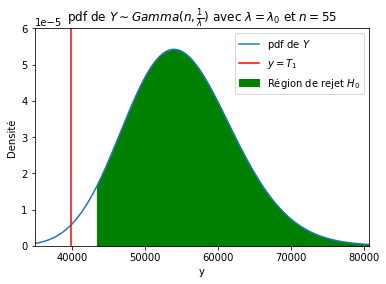

In [11]:
# Obtains the pdf
y = np.linspace(sp.stats.gamma.ppf(q=0.001, a=len(costs), scale=1/λ0), sp.stats.gamma.ppf(q=0.999, a=len(costs), scale=1/λ0), 1000)
fY = sp.stats.gamma.pdf(x=y, a=len(costs), scale=1/λ0)

# Obtains the rejected region
y_rej_min = sp.stats.gamma.ppf(q=α, a=len(costs), scale=1/λ0)
y_rej = y[y >= y_rej_min]
fY_rej = fY[-len(y_rej):]

# Obtains the estimated y value
T1 = np.sum(costs)

# Plot
plt.plot(y, fY)
plt.fill_between(y_rej, 0, fY_rej, color="green")
plt.axvline(x=T1, color="red")
plt.title(r"pdf de $Y \sim Gamma(n, \frac{1}{\lambda})$ avec $\lambda = \lambda_0$ et $n =$" + str(len(costs)))
plt.legend([r"pdf de $Y$", r"$y = T_1$", r"Région de rejet $H_0$"])
plt.xlabel("y")
plt.ylabel("Densité")
plt.ylim(0, 6E-5)
plt.xlim(y[0], y[-1])
plt.show()

# Exercise 3.5

Grâce au graphique tracé ci-dessous, nous pouvons conclure que plus le nombre d'échantillons est grand, plus le slope de la fonction de puissance en fonction de $\lambda$ est grande, c'est-à-dire la probabilité de rejeter $H_0$ où $H_0$ est false croît beaucoup plus vite plus le n est élevé. 

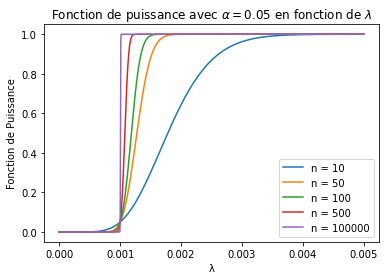

In [12]:
# Defines the sample sizes and λ arrays
sample_sizes = [10, 50, 100, 500, 100000]
λ = np.linspace(1E-9, 5*λ0, 1000)

# Plots the power function for every n in sample_sizes
for n in sample_sizes:
    limit = sp.stats.gamma.ppf(q=α, a=n, scale=1/λ0)
    power_fcn = sp.stats.gamma.cdf(x=limit, a=n, scale=1/λ)
    plt.plot(λ, power_fcn)

# Adds some details to the plot
plt.title(r"Fonction de puissance avec $\alpha = 0.05$ en fonction de $\lambda$")
plt.legend([f"n = {n}" for n in sample_sizes])
plt.xlabel("λ")
plt.ylabel("Fonction de Puissance")
plt.show()

# Exercise 3.6

Le théorème de la limite centrale nous dit que pour un nombre d'échantillons suffisamment grand, la distribution de la variable aléatoire $Y$ peut être approximée à une distribution normale avec moyenne $\mu = E\left[Y\right]$ et variance $\sigma^2 = Var\left(Y\right)$. Puisque $Y \sim Gamma\left(n, \frac{1}{\lambda}\right)$, nous avons $E\left[Y\right] = \frac{n}{\lambda}$ e $Var\left(Y\right) = \frac{n}{\lambda^2}$. Ainsi, selon le théorème central limite, on a:

<br>

\begin{aligned}
    Y \quad & \sim \quad \mathcal{N}\left(\frac{n}{\lambda}, \ \frac{n}{\lambda^2}\right)
\end{aligned}

<br>

Ainsi, nous pouvons refaire notre question initiale (le coût moyen d'un accident est inférieur à 1 milliard de dollars) en considérant la distribution normale. Ainsi, les hypothèses $H_0$ et $H_1$ seront données par:

<br>

\begin{aligned}
    H_0: \quad \lambda \quad > \quad 10^{-3} \\
    H_1: \quad \lambda \quad \leq \quad 10^{-3} 
\end{aligned}

<br>

Ainsi, considérant la distribution normale, nous acceptons toujours l'hypothèse nulle puisque la p-value ($p \approx 0.979$) obtenue (ci-dessous) est supperieur à $1-\alpha = 0.95$ (bien qu'elle soit légèrement plus petite à celle obtenue avec la distribution exponentielle). Ainsi, nous continuons avec le résultat que le coût moyen d'un accident est inférieur à un milliard de dollars.

p-value: 0.9787985360936009



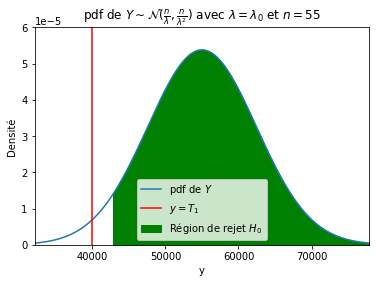

In [14]:
# Defines the constants
µ = len(costs)/λ0
var = len(costs)/λ0**2

# Obtains the p-value
p = sp.stats.norm.sf(x=np.sum(costs), loc=µ, scale=np.sqrt(var))
print(f"p-value: {p}\n")

# Obtains the pdf
y = np.linspace(sp.stats.norm.ppf(q=0.001, loc=µ, scale=np.sqrt(var)), sp.stats.norm.ppf(q=0.999, loc=µ, scale=np.sqrt(var)), 1000)
fY = sp.stats.norm.pdf(x=y, loc=µ, scale=np.sqrt(var))

# Obtains the rejected region
y_rej_min = sp.stats.norm.ppf(q=α, loc=µ, scale=np.sqrt(var))
y_rej = y[y >= y_rej_min]
fY_rej = fY[-len(y_rej):]

# Obtains the estimated y value
T1 = np.sum(costs)

# Plot
plt.plot(y, fY)
plt.fill_between(y_rej, 0, fY_rej, color="green")
plt.axvline(x=T1, color="red")
plt.title(r"pdf de $Y \sim \mathcal{N}(\frac{n}{\lambda}, \frac{n}{\lambda^2})$ avec $\lambda = \lambda_0$ et $n =$" + str(len(costs)))
plt.legend([r"pdf de $Y$", r"$y = T_1$", r"Région de rejet $H_0$"])
plt.xlabel("y")
plt.ylabel("Densité")
plt.ylim(0, 6E-5)
plt.xlim(y[0], y[-1])
plt.show()